In [1]:
abalone <- read.csv("../dataset/abalone.data.txt")

In [2]:
colnames(abalone) <- c('sex','length','diameter','height','whole','shucked','viscera','shell','rings')
head(abalone)
dim(abalone)

sex,length,diameter,height,whole,shucked,viscera,shell,rings
M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20


[1] 4176    9

In [4]:
summary(abalone)

 sex          length         diameter          height           whole       
 F:1307   Min.   :0.075   Min.   :0.0550   Min.   :0.0000   Min.   :0.0020  
 I:1342   1st Qu.:0.450   1st Qu.:0.3500   1st Qu.:0.1150   1st Qu.:0.4415  
 M:1527   Median :0.545   Median :0.4250   Median :0.1400   Median :0.7997  
          Mean   :0.524   Mean   :0.4079   Mean   :0.1395   Mean   :0.8288  
          3rd Qu.:0.615   3rd Qu.:0.4800   3rd Qu.:0.1650   3rd Qu.:1.1533  
          Max.   :0.815   Max.   :0.6500   Max.   :1.1300   Max.   :2.8255  
    shucked          viscera            shell            rings       
 Min.   :0.0010   Min.   :0.00050   Min.   :0.0015   Min.   : 1.000  
 1st Qu.:0.1860   1st Qu.:0.09337   1st Qu.:0.1300   1st Qu.: 8.000  
 Median :0.3360   Median :0.17100   Median :0.2340   Median : 9.000  
 Mean   :0.3594   Mean   :0.18061   Mean   :0.2389   Mean   : 9.932  
 3rd Qu.:0.5020   3rd Qu.:0.25300   3rd Qu.:0.3290   3rd Qu.:11.000  
 Max.   :1.4880   Max.   :0.76000   Max. 

In [5]:
abalone <- na.omit(abalone)

In [6]:
cor(abalone[,-1])

,length,diameter,height,whole,shucked,viscera,shell,rings
length,1.0000000,0.9868132,0.8275521,0.9252551,0.8979052,0.9030105,0.8976970,0.5571226
diameter,0.9868132,1.0000000,0.8337053,0.9254520,0.8931591,0.8997262,0.9053281,0.5750054
height,0.8275521,0.8337053,1.0000000,0.8192087,0.7749568,0.7982929,0.8173261,0.5581087
whole,0.9252551,0.9254520,0.8192087,1.0000000,0.9694027,0.9663721,0.9553511,0.5408179
shucked,0.8979052,0.8931591,0.7749568,0.9694027,1.0000000,0.9319557,0.8826063,0.4212556
viscera,0.9030105,0.8997262,0.7982929,0.9663721,0.9319557,1.0000000,0.9076469,0.5042735
shell,0.8976970,0.9053281,0.8173261,0.9553511,0.8826063,0.9076469,1.0000000,0.6280306
rings,0.5571226,0.5750054,0.5581087,0.5408179,0.4212556,0.5042735,0.6280306,1.0000000


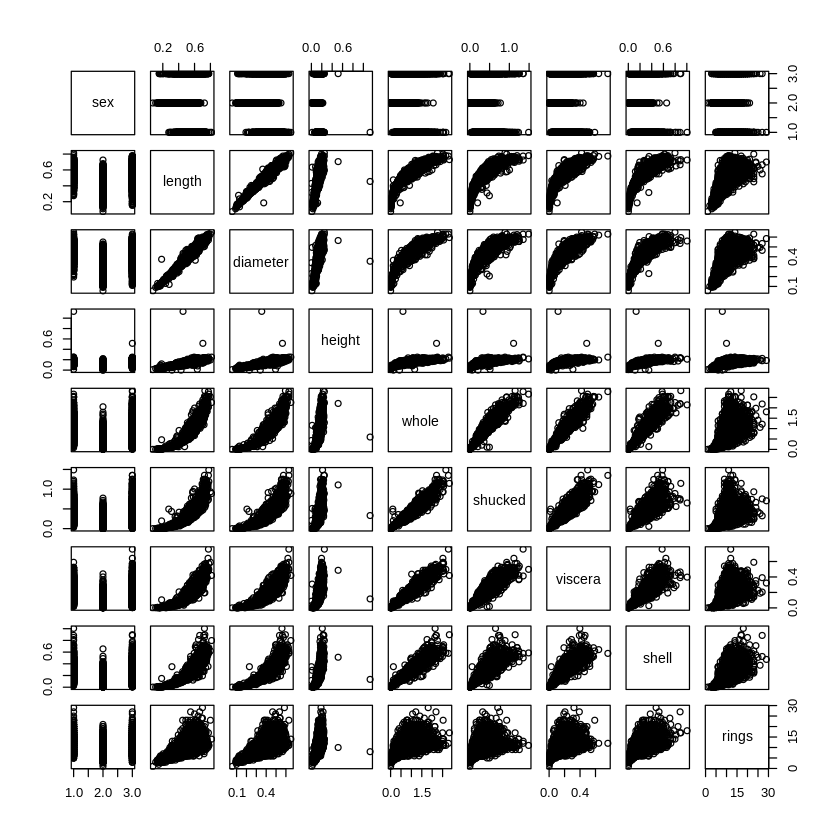

In [7]:
pairs(abalone)

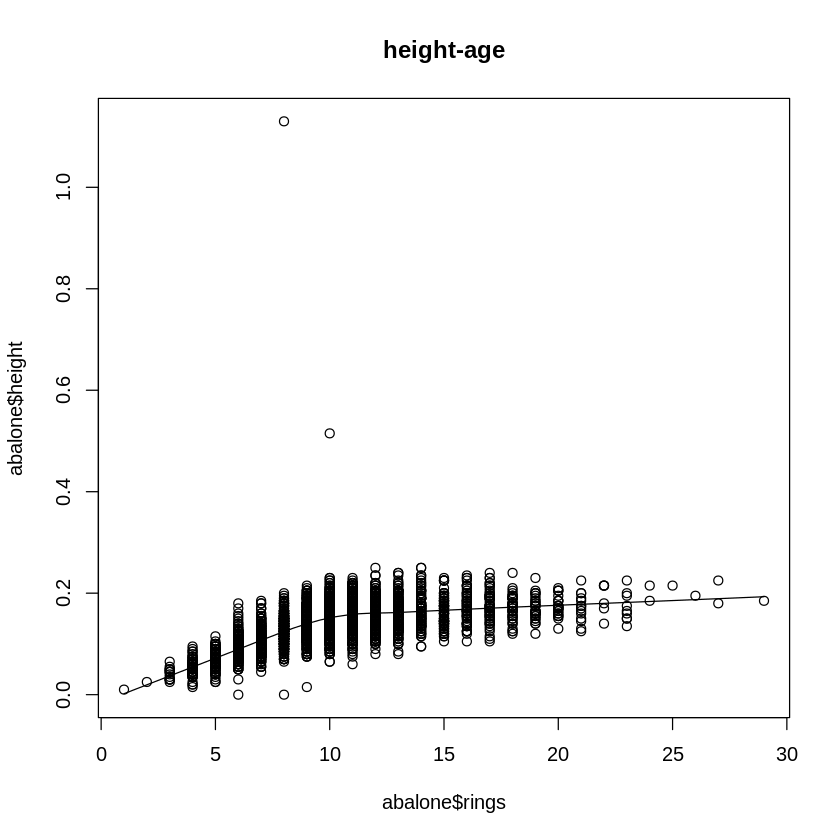

In [8]:
scatter.smooth(x=abalone$rings, y=abalone$height, main="height-age")

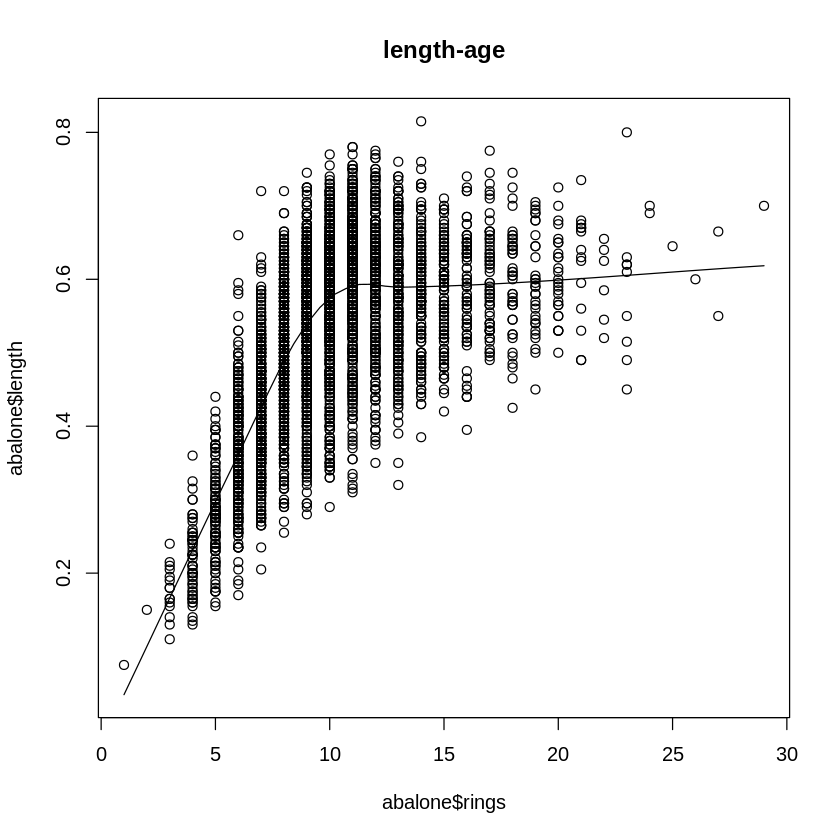

In [9]:
scatter.smooth(x=abalone$rings, y=abalone$length, main="length-age")

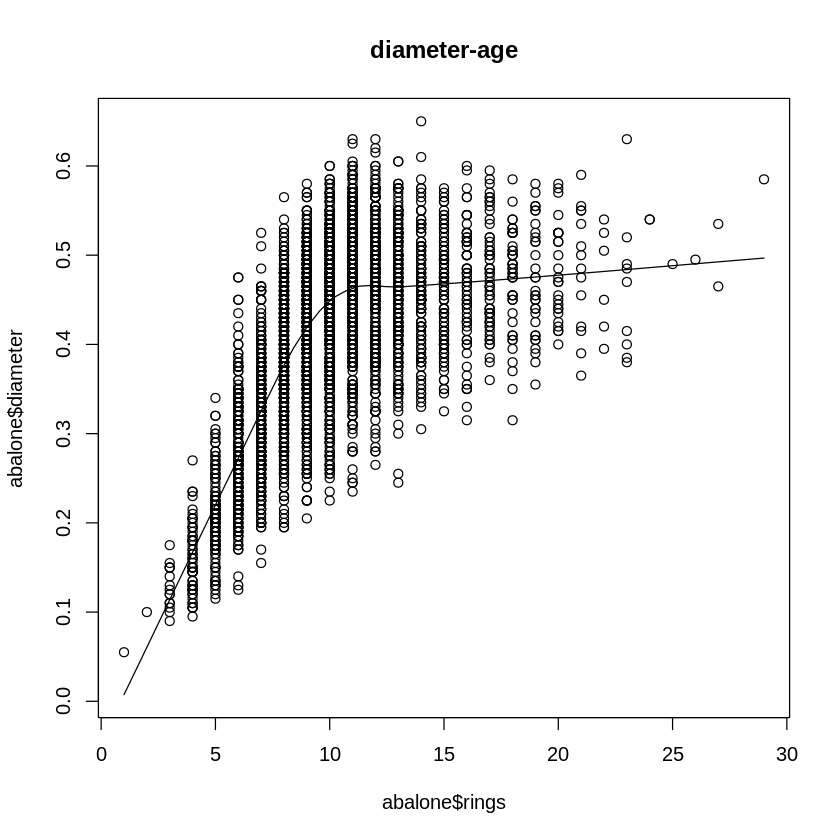

In [10]:
scatter.smooth(x=abalone$rings, y=abalone$diameter, main="diameter-age")

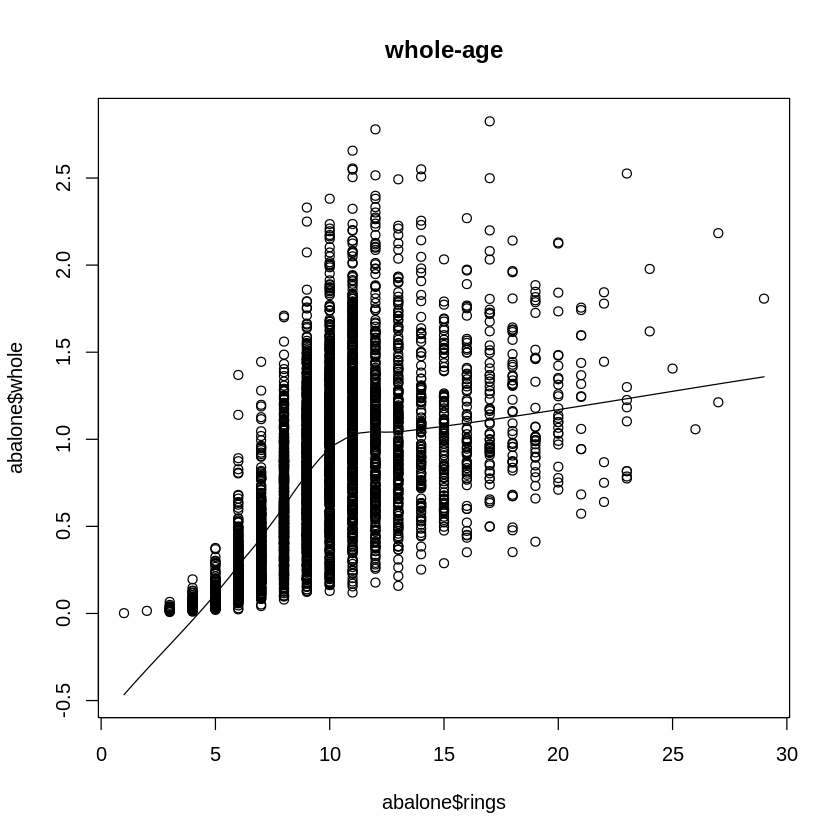

In [11]:
scatter.smooth(x=abalone$rings, y=abalone$whole, main="whole-age")

In [12]:
multilinear <- lm(rings ~ length + height + diameter + sex + whole + shucked + viscera + shell, data = abalone)
summary(multilinear)


Call:
lm(formula = rings ~ length + height + diameter + sex + whole + 
    shucked + viscera + shell, data = abalone)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.5517  -1.3022  -0.3402   0.8596  13.9452 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.88869    0.29137  13.346  < 2e-16 ***
length       -0.40813    1.80793  -0.226    0.821    
height       10.83509    1.53536   7.057 1.98e-12 ***
diameter     10.99028    2.22592   4.937 8.23e-07 ***
sexI         -0.82222    0.10233  -8.035 1.21e-15 ***
sexM          0.05426    0.08330   0.651    0.515    
whole         8.96980    0.72489  12.374  < 2e-16 ***
shucked     -19.78271    0.81677 -24.221  < 2e-16 ***
viscera     -10.55956    1.29285  -8.168 4.13e-16 ***
shell         8.75088    1.12393   7.786 8.67e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.193 on 4166 degrees of freedom
Multiple R-squared:  0.5384,	Adjusted R-sq

In [13]:
#use length or height for benchmark model
lengthlinear <- lm(rings ~ length, data = abalone)
heightlinear <- lm(rings ~ height, data = abalone)
summary(lengthlinear)
summary(heightlinear)


Call:
lm(formula = rings ~ length, data = abalone)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.9660 -1.6973 -0.7417  0.8751 16.6789 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.0968     0.1855   11.30   <2e-16 ***
length       14.9534     0.3450   43.34   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.677 on 4174 degrees of freedom
Multiple R-squared:  0.3104,	Adjusted R-squared:  0.3102 
F-statistic:  1879 on 1 and 4174 DF,  p-value: < 2.2e-16



Call:
lm(formula = rings ~ height, data = abalone)

Residuals:
    Min      1Q  Median      3Q     Max 
-44.537  -1.651  -0.630   0.835  17.112 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.9309     0.1442   27.26   <2e-16 ***
height       43.0140     0.9899   43.45   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.675 on 4174 degrees of freedom
Multiple R-squared:  0.3115,	Adjusted R-squared:  0.3113 
F-statistic:  1888 on 1 and 4174 DF,  p-value: < 2.2e-16


#for the R square result, the single linear models, R square only around 0.3, but for multilinear model, the R square was 0.5, so we can conclude that multilinear model performs better than then the single linear models.